In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.bandpass

In [ ]:
import os
import itertools
import time
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from torch.optim.lr_scheduler import (CosineAnnealingLR,
                                      CosineAnnealingWarmRestarts,
                                      StepLR,
                                      ExponentialLR)

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, auc, f1_score, precision_score, recall_score

In [ ]:
import tqdm, re, sys
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import plot_confusion_matrix
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint

In [ ]:
data_total = pd.read_csv('/content/drive/MyDrive/model_2s/total_band.csv', header=None)

In [ ]:
data_total

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
0,-0.031820,-0.015874,-0.001172,0.011249,0.020713,0.026974,0.030190,0.030831,0.029559,0.027102,...,-0.072854,-0.070401,-0.067539,-0.064716,-0.062285,-0.060443,-0.059208,-0.058448,-0.057940,1.0
1,-0.057454,-0.056822,-0.055984,-0.054985,-0.053945,-0.052999,-0.052250,-0.051733,-0.051414,-0.051213,...,-0.071806,-0.071741,-0.071302,-0.070367,-0.068861,-0.066758,-0.064085,-0.060936,-0.057487,1.0
2,-0.054004,-0.050825,-0.048322,-0.046824,-0.046532,-0.047445,-0.049330,-0.051735,-0.054058,-0.055645,...,0.009824,0.013030,0.016239,0.019380,0.022418,0.025327,0.028062,0.030516,0.032514,1.0
3,0.053295,0.053439,0.055066,0.059409,0.067278,0.078961,0.094216,0.112361,0.132422,0.153321,...,0.388900,0.382609,0.370062,0.351265,0.326472,0.296135,0.260876,0.221465,0.178820,1.0
4,0.134007,0.088232,0.042803,-0.000932,-0.041686,-0.078336,-0.110032,-0.136271,-0.156943,-0.172313,...,-0.113220,-0.141579,-0.164040,-0.180986,-0.193086,-0.201181,-0.206146,-0.208783,-0.209743,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,-0.087605,-0.069234,-0.058444,-0.053914,-0.053427,-0.054525,-0.055053,-0.053525,-0.049262,-0.042344,...,-0.020100,-0.018824,-0.018132,-0.018247,-0.019303,-0.021303,-0.024082,-0.027314,-0.030559,100.0
17996,-0.033347,-0.035287,-0.036169,-0.036014,-0.035070,-0.033744,-0.032503,-0.031760,-0.031802,-0.032746,...,-0.060069,-0.061489,-0.061986,-0.061385,-0.059834,-0.057803,-0.055972,-0.055062,-0.055631,100.0
17997,-0.076867,-0.083002,-0.088128,-0.091454,-0.092582,-0.091623,-0.089189,-0.086281,-0.084051,-0.083490,...,-0.053679,-0.057318,-0.059515,-0.061043,-0.062554,-0.064528,-0.067243,-0.070758,-0.074902,100.0
17998,-0.079288,-0.083358,-0.086464,-0.087995,-0.087513,-0.084880,-0.080336,-0.074488,-0.068211,-0.062467,...,-0.048461,-0.044455,-0.041670,-0.040185,-0.039799,-0.040120,-0.040694,-0.041169,-0.041409,100.0


## 데이터 전체 섞기

In [ ]:
data_total=data_total.sample(frac=1)

In [ ]:
data_train=data_total.iloc[0:14400, :]
data_val=data_total.iloc[14400:16200, :]
data_test=data_total.iloc[16200:18000,:]

In [ ]:
data_train

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
13096,-0.050835,-0.049955,-0.047396,-0.043498,-0.038908,-0.034459,-0.031010,-0.029260,-0.029599,-0.032018,...,-0.026675,-0.023878,-0.020451,-0.016205,-0.010906,-0.004367,0.003467,0.012462,0.022282,73.0
14015,0.334022,0.344068,0.352652,0.358983,0.362081,0.360883,0.354374,0.341746,0.322564,0.296894,...,-0.070968,-0.070659,-0.070806,-0.071741,-0.073799,-0.077241,-0.082172,-0.088471,-0.095762,78.0
5395,-0.038915,-0.035652,-0.034952,-0.037018,-0.041736,-0.048691,-0.057248,-0.066680,-0.076291,-0.085520,...,-0.000616,-0.010160,-0.016861,-0.021242,-0.023847,-0.025205,-0.025815,-0.026107,-0.026400,30.0
3000,-0.066921,-0.062802,-0.059281,-0.056816,-0.055619,-0.055620,-0.056506,-0.057812,-0.059031,-0.059732,...,-0.099807,-0.105695,-0.107757,-0.106381,-0.102430,-0.097121,-0.091819,-0.087783,-0.085938,17.0
15994,-0.040558,-0.036159,-0.030604,-0.024281,-0.017749,-0.011654,-0.006618,-0.003158,-0.001631,-0.002216,...,-0.052934,-0.050671,-0.047829,-0.044536,-0.040964,-0.037296,-0.033688,-0.030263,-0.027107,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11887,-0.132853,-0.133607,-0.134204,-0.134345,-0.133755,-0.132263,-0.129848,-0.126636,-0.122836,-0.118636,...,-0.074517,-0.074244,-0.073707,-0.072962,-0.072074,-0.071107,-0.070101,-0.069058,-0.067929,67.0
5556,-0.012407,-0.016077,-0.018572,-0.019023,-0.017072,-0.012936,-0.007314,-0.001177,0.004477,0.008846,...,0.022531,0.015122,0.007310,0.001304,-0.001639,-0.001279,0.001778,0.006399,0.011307,31.0
3074,-0.028002,-0.030009,-0.032056,-0.033967,-0.035531,-0.036543,-0.036861,-0.036462,-0.035490,-0.034245,...,-0.079476,-0.080127,-0.081072,-0.082254,-0.083592,-0.084977,-0.086274,-0.087332,-0.087999,18.0
9894,-0.019427,0.044036,0.111657,0.185185,0.262317,0.336364,0.397391,0.434547,0.438937,0.406213,...,-0.039651,-0.033872,-0.028633,-0.024593,-0.022450,-0.022735,-0.025612,-0.030723,-0.037157,55.0


## 전처리

In [ ]:
y_train = to_categorical(data_train[512])
y_test = to_categorical(data_test[512])
y_val = to_categorical(data_val[512])
y_train[14399]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
data_train.drop([512], axis=1, inplace=True)
data_test.drop([512], axis=1, inplace=True)
data_val.drop([512], axis=1, inplace=True)
data_train

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
13096,-0.050835,-0.049955,-0.047396,-0.043498,-0.038908,-0.034459,-0.031010,-0.029260,-0.029599,-0.032018,...,-0.028909,-0.026675,-0.023878,-0.020451,-0.016205,-0.010906,-0.004367,0.003467,0.012462,0.022282
14015,0.334022,0.344068,0.352652,0.358983,0.362081,0.360883,0.354374,0.341746,0.322564,0.296894,...,-0.071463,-0.070968,-0.070659,-0.070806,-0.071741,-0.073799,-0.077241,-0.082172,-0.088471,-0.095762
5395,-0.038915,-0.035652,-0.034952,-0.037018,-0.041736,-0.048691,-0.057248,-0.066680,-0.076291,-0.085520,...,0.012234,-0.000616,-0.010160,-0.016861,-0.021242,-0.023847,-0.025205,-0.025815,-0.026107,-0.026400
3000,-0.066921,-0.062802,-0.059281,-0.056816,-0.055619,-0.055620,-0.056506,-0.057812,-0.059031,-0.059732,...,-0.090178,-0.099807,-0.105695,-0.107757,-0.106381,-0.102430,-0.097121,-0.091819,-0.087783,-0.085938
15994,-0.040558,-0.036159,-0.030604,-0.024281,-0.017749,-0.011654,-0.006618,-0.003158,-0.001631,-0.002216,...,-0.054570,-0.052934,-0.050671,-0.047829,-0.044536,-0.040964,-0.037296,-0.033688,-0.030263,-0.027107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11887,-0.132853,-0.133607,-0.134204,-0.134345,-0.133755,-0.132263,-0.129848,-0.126636,-0.122836,-0.118636,...,-0.074498,-0.074517,-0.074244,-0.073707,-0.072962,-0.072074,-0.071107,-0.070101,-0.069058,-0.067929
5556,-0.012407,-0.016077,-0.018572,-0.019023,-0.017072,-0.012936,-0.007314,-0.001177,0.004477,0.008846,...,0.026687,0.022531,0.015122,0.007310,0.001304,-0.001639,-0.001279,0.001778,0.006399,0.011307
3074,-0.028002,-0.030009,-0.032056,-0.033967,-0.035531,-0.036543,-0.036861,-0.036462,-0.035490,-0.034245,...,-0.079158,-0.079476,-0.080127,-0.081072,-0.082254,-0.083592,-0.084977,-0.086274,-0.087332,-0.087999
9894,-0.019427,0.044036,0.111657,0.185185,0.262317,0.336364,0.397391,0.434547,0.438937,0.406213,...,-0.045476,-0.039651,-0.033872,-0.028633,-0.024593,-0.022450,-0.022735,-0.025612,-0.030723,-0.037157


In [ ]:
X_train=data_train.values
X_test=data_test.values
X_val=data_val.values

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(14400, 512)
(1800, 512)
(1800, 512)
(14400, 101)
(1800, 101)
(1800, 101)


In [ ]:

X_train = X_train.reshape(14400, 512, 1)
X_test = X_test.reshape(1800, 512, 1)
X_val = X_val.reshape(1800, 512, 1)
X_train.shape, X_test.shape, X_val.shape

((14400, 512, 1), (1800, 512, 1), (1800, 512, 1))

## LSTM

In [ ]:
from keras.layers import Input, Embedding, GRU, LSTM, SimpleRNN, MaxPooling1D, GlobalMaxPool1D, CuDNNGRU
from keras.layers import Dropout, Dense, Activation, Flatten, Conv1D, SpatialDropout1D
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units=150, return_sequences=True, input_shape=(512,1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=True))

model.add(Flatten())
model.add(Dropout(0.1))

model.add(Dense(101, activation='softmax'))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 512, 150)          91200     
                                                                 
 lstm_13 (LSTM)              (None, 512, 50)           40200     
                                                                 
 lstm_14 (LSTM)              (None, 512, 50)           20200     
                                                                 
 flatten_3 (Flatten)         (None, 25600)             0         
                                                                 
 dropout_3 (Dropout)         (None, 25600)             0         
                                                                 
 dense_3 (Dense)             (None, 101)               2585701   
                                                                 
Total params: 2,737,301
Trainable params: 2,737,301
No

## 모델학습/평가

In [ ]:
history = model.fit(X_train, y_train, batch_size =1024, epochs = 500, verbose = 1, validation_data=(X_val, y_val))

Epoch 1/500
15/15 [==============================] - 11s 449ms/step - loss: 0.0098 - accuracy: 0.0105 - val_loss: 0.0098 - val_accuracy: 0.0072
Epoch 2/500
15/15 [==============================] - 6s 386ms/step - loss: 0.0098 - accuracy: 0.0110 - val_loss: 0.0098 - val_accuracy: 0.0139
Epoch 3/500
15/15 [==============================] - 6s 390ms/step - loss: 0.0098 - accuracy: 0.0113 - val_loss: 0.0098 - val_accuracy: 0.0128
Epoch 4/500
15/15 [==============================] - 6s 393ms/step - loss: 0.0098 - accuracy: 0.0099 - val_loss: 0.0098 - val_accuracy: 0.0111
Epoch 5/500
15/15 [==============================] - 6s 396ms/step - loss: 0.0098 - accuracy: 0.0112 - val_loss: 0.0098 - val_accuracy: 0.0094
Epoch 6/500
15/15 [==============================] - 6s 399ms/step - loss: 0.0098 - accuracy: 0.0110 - val_loss: 0.0098 - val_accuracy: 0.0061
Epoch 7/500
15/15 [==============================] - 6s 401ms/step - loss: 0.0098 - accuracy: 0.0139 - val_loss: 0.0098 - val_accuracy: 0.004

In [ ]:
model.evaluate(X_test, y_test)

57/57 [==============================] - 1s 22ms/step - loss: 0.0014 - accuracy: 0.9094


[0.0014196085976436734, 0.9094444513320923]

In [ ]:
model.save('lstm_bandpass_2s.h5')

## 그래프 분석

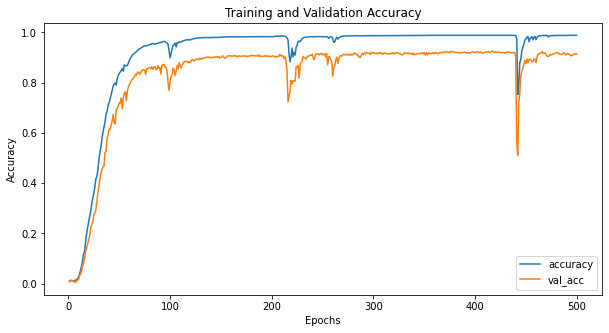

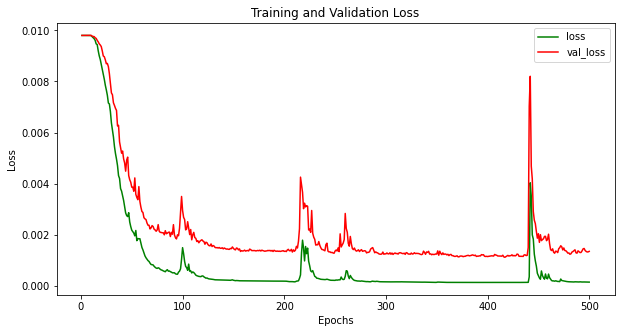

In [ ]:
history=history.history
epochs = range(1, len(history['loss']) + 1)
acc = history['accuracy']
loss = history['loss']
val_acc = history['val_accuracy']
val_loss = history['val_loss']

plt.figure(figsize=(10, 5))
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

plt.figure(figsize=(10, 5))
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()


## 예측해보기(predict)

- 모델을 잊어버리고 저장을 안해놔서 해당 모델 예측해보기는 못했습니다.

In [ ]:
y_pred = model.predict(X_test)

188/188 [==============================] - 2s 9ms/step


array([[44,  0,  0, ...,  0,  0,  0],
       [ 0, 57,  0, ...,  0,  0,  0],
       [ 0,  0, 65, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 68,  0,  0],
       [ 0,  0,  0, ...,  0, 67,  0],
       [ 0,  0,  0, ...,  0,  0, 57]])

In [ ]:
y_test_p=pd.DataFrame(y_test)

for i in range(1,101):
  y_test_p.loc[y_test_p[i] == 1.0 , 'y_test'] = i  
y_test_p.y_test

0       59.0
1       68.0
2       72.0
3        2.0
4       57.0
        ... 
5995     3.0
5996    87.0
5997    40.0
5998    68.0
5999    37.0
Name: y_test, Length: 6000, dtype: float64

In [ ]:
ex=np.argmax(y_pred, axis=1)
ex=ex.astype('float64')
ex=pd.DataFrame(ex)
ex

,0
0,59.0
1,68.0
2,72.0
3,2.0
4,57.0
...,...
5995,3.0
5996,87.0
5997,40.0
5998,68.0


In [ ]:
ch1 = pd.DataFrame(np.rint(y_pred))
ch1['pred'] = ex
data_test.reset_index(inplace=True, drop=True)
predict = pd.concat([data_test,ch1['pred'], y_test_p['y_test']],axis = 1)

In [ ]:
predict['compare'] = np.where(predict['pred']==predict['y_test'],'yes', 'no')

In [ ]:
predict_1 = predict[predict["compare"]=='no']
predict_1

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,pred,y_test,compare
30,0.001909,0.008317,0.014489,0.020412,0.025995,0.031137,0.035801,0.040075,0.044195,0.048538,...,0.044631,0.050399,0.057432,0.066046,0.076371,0.088327,0.101648,85.0,36.0,no
46,0.096114,0.095362,0.095047,0.095447,0.096676,0.098677,0.101247,0.104083,0.106844,0.109202,...,-0.004398,-0.008214,-0.013081,-0.019006,-0.025674,-0.032320,-0.037693,83.0,80.0,no
54,-0.041972,-0.048778,-0.055266,-0.061636,-0.067728,-0.073065,-0.076978,-0.078796,-0.078050,-0.074630,...,-0.102289,-0.108650,-0.114708,-0.119718,-0.122885,-0.123496,-0.121095,20.0,71.0,no
55,0.050686,0.056807,0.061922,0.066330,0.070463,0.074831,0.079964,0.086349,0.094365,0.104239,...,0.125449,0.136371,0.147691,0.159697,0.172642,0.186692,0.201860,41.0,50.0,no
71,-0.511413,-0.507140,-0.469849,-0.408462,-0.333769,-0.256404,-0.185178,-0.126038,-0.081724,-0.052058,...,0.031533,0.034874,0.038518,0.042180,0.045745,0.049241,0.052764,4.0,93.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,0.005315,-0.043084,-0.083200,-0.110473,-0.122973,-0.121490,-0.109050,-0.090022,-0.069069,-0.050204,...,-0.027012,-0.029614,-0.031356,-0.033020,-0.035244,-0.038329,-0.042129,95.0,23.0,no
5981,-0.005281,-0.018280,-0.031669,-0.042939,-0.050464,-0.053648,-0.052817,-0.048958,-0.043371,-0.037307,...,-0.016826,-0.013496,-0.011275,-0.010594,-0.011830,-0.015208,-0.020697,52.0,40.0,no
5992,-0.084734,-0.091664,-0.098196,-0.101411,-0.098148,-0.085744,-0.062829,-0.030004,0.009808,0.051498,...,0.072150,0.081214,0.090895,0.101388,0.112932,0.125713,0.139775,100.0,83.0,no
5994,0.008461,0.011468,0.012707,0.012096,0.009875,0.006558,0.002841,-0.000513,-0.002782,-0.003375,...,-0.048723,-0.051678,-0.052151,-0.050205,-0.046318,-0.041326,-0.036264,95.0,49.0,no


# 2.highpass

In [ ]:
import os
import itertools
import time
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from torch.optim.lr_scheduler import (CosineAnnealingLR,
                                      CosineAnnealingWarmRestarts,
                                      StepLR,
                                      ExponentialLR)

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, auc, f1_score, precision_score, recall_score

In [ ]:
import tqdm, re, sys
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import plot_confusion_matrix
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint

In [ ]:
data_total = pd.read_csv('/content/drive/MyDrive/model_2s/total_high.csv', header=None)

In [ ]:
data_total

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
0,-0.011566,0.077466,0.083038,0.015121,-0.024216,0.026618,0.112943,0.067018,-0.022367,0.035899,...,-0.102607,-0.121740,-0.038993,-0.017367,-0.083201,-0.108995,-0.055099,0.004076,-0.050829,1.0
1,-0.124635,-0.101820,-0.004986,-0.009573,-0.097080,-0.078287,-0.033934,0.011788,-0.100740,-0.105788,...,-0.074093,-0.113909,-0.113364,-0.053677,-0.015389,-0.088530,-0.122749,-0.019986,-0.033522,1.0
2,-0.088677,-0.125790,-0.030982,0.007508,-0.029261,-0.106478,-0.080494,-0.011038,-0.021531,-0.121852,...,0.090296,-0.007490,-0.026310,0.053336,0.110380,0.044460,-0.027323,0.009700,0.105980,1.0
3,0.164484,0.137004,0.165505,0.176745,0.186086,0.149056,0.190527,0.256168,0.278809,0.242770,...,0.391745,0.360085,0.331456,0.324828,0.310089,0.291611,0.224983,0.176666,0.166279,1.0
4,0.152732,0.074585,-0.013711,-0.034827,-0.023673,-0.104258,-0.139073,-0.163288,-0.166813,-0.192017,...,-0.089275,-0.098827,-0.167260,-0.194723,-0.183527,-0.151331,-0.188605,-0.218650,-0.179596,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,-0.076292,-0.111654,-0.075956,-0.069888,-0.045250,-0.063222,-0.042144,-0.062486,-0.043508,-0.019340,...,-0.062754,0.002815,-0.032905,-0.016336,-0.045078,0.004621,-0.020431,0.005698,-0.048605,100.0
17996,-0.048497,-0.030079,-0.042822,-0.063725,-0.028908,-0.011291,-0.015405,-0.037688,-0.033962,-0.027736,...,-0.019348,-0.078060,-0.082112,-0.081604,-0.070175,-0.080676,-0.072666,0.004694,-0.046835,100.0
17997,-0.017653,0.005880,-0.008398,-0.053956,-0.045114,-0.050892,-0.014791,-0.025570,-0.044989,-0.027848,...,-0.057440,-0.065800,-0.044000,-0.082399,-0.083447,-0.065335,-0.088911,-0.080017,-0.076062,100.0
17998,-0.091136,-0.072359,-0.082491,-0.096773,-0.108624,-0.106044,-0.096813,-0.094621,-0.049099,-0.103425,...,-0.064874,-0.019088,-0.028823,-0.049239,-0.026504,-0.037821,-0.061718,-0.066845,-0.059923,100.0


## 데이터 전체 섞기

In [ ]:
data_total=data_total.sample(frac=1)

In [ ]:
data_train=data_total.iloc[0:14400, :]
data_val=data_total.iloc[14400:16200, :]
data_test=data_total.iloc[16200:18000,:]

In [ ]:
data_train

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
11972,-0.118944,-0.097710,-0.141156,-0.121442,-0.129578,-0.100904,-0.086199,-0.118905,-0.100970,-0.067876,...,0.029167,0.051946,0.052145,0.032114,0.039684,0.060624,0.037964,0.085715,0.082346,67.0
9485,-0.055895,-0.039202,-0.055241,-0.074049,-0.039119,-0.034539,-0.090239,-0.036930,-0.066542,-0.035554,...,-0.022918,-0.033455,-0.051762,-0.060188,-0.053004,-0.069670,-0.049045,-0.102779,-0.082693,53.0
16865,-0.021957,0.020436,-0.012769,0.007826,0.006553,0.024852,0.007381,0.000252,-0.028275,-0.043701,...,-0.043038,-0.045536,-0.006004,-0.001711,-0.022649,-0.004198,-0.005766,-0.054234,-0.007852,94.0
15475,0.050189,-0.041782,-0.014473,0.027127,-0.052534,-0.035044,-0.057463,-0.062753,-0.091102,-0.062281,...,-0.068878,-0.084586,-0.102791,-0.123175,-0.068607,-0.073897,-0.124706,-0.107012,-0.109267,86.0
15221,-0.108148,-0.073405,-0.108082,-0.058189,-0.065407,-0.099554,-0.095312,-0.100020,-0.050718,-0.053656,...,-0.069281,-0.118103,-0.076705,-0.079157,-0.143928,-0.095539,-0.086270,-0.106641,-0.049301,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,0.006539,0.004692,-0.002344,0.004821,0.000217,0.020083,0.034641,0.033169,0.037178,0.049388,...,-0.086765,-0.063205,-0.073705,-0.074656,-0.058118,-0.071651,-0.065574,-0.064319,-0.057024,7.0
2755,-0.090322,-0.064564,-0.061915,-0.061057,-0.056179,-0.072241,-0.069663,-0.057076,-0.038108,-0.049821,...,-0.022459,-0.041112,-0.020717,-0.052411,-0.030156,-0.055331,-0.089667,-0.058392,-0.038189,16.0
1669,0.001481,0.016193,-0.019005,0.018697,-0.009921,-0.024839,-0.011968,-0.052376,-0.007625,-0.035974,...,-0.034174,-0.018502,-0.050910,-0.066058,-0.041296,-0.033853,-0.069880,-0.018448,-0.047695,10.0
1208,0.248835,0.268121,0.279817,0.295283,0.288009,0.292825,0.299892,0.317068,0.295535,0.281801,...,-0.038975,-0.045902,-0.051699,-0.059867,-0.056366,-0.079405,-0.068734,-0.090714,-0.076794,7.0


## 전처리

In [ ]:
y_train = to_categorical(data_train[512])
y_test = to_categorical(data_test[512])
y_val = to_categorical(data_val[512])
y_train[14399]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
data_train.drop([512], axis=1, inplace=True)
data_test.drop([512], axis=1, inplace=True)
data_val.drop([512], axis=1, inplace=True)
data_train

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
11972,-0.118944,-0.097710,-0.141156,-0.121442,-0.129578,-0.100904,-0.086199,-0.118905,-0.100970,-0.067876,...,0.045639,0.029167,0.051946,0.052145,0.032114,0.039684,0.060624,0.037964,0.085715,0.082346
9485,-0.055895,-0.039202,-0.055241,-0.074049,-0.039119,-0.034539,-0.090239,-0.036930,-0.066542,-0.035554,...,-0.009490,-0.022918,-0.033455,-0.051762,-0.060188,-0.053004,-0.069670,-0.049045,-0.102779,-0.082693
16865,-0.021957,0.020436,-0.012769,0.007826,0.006553,0.024852,0.007381,0.000252,-0.028275,-0.043701,...,-0.023880,-0.043038,-0.045536,-0.006004,-0.001711,-0.022649,-0.004198,-0.005766,-0.054234,-0.007852
15475,0.050189,-0.041782,-0.014473,0.027127,-0.052534,-0.035044,-0.057463,-0.062753,-0.091102,-0.062281,...,-0.078850,-0.068878,-0.084586,-0.102791,-0.123175,-0.068607,-0.073897,-0.124706,-0.107012,-0.109267
15221,-0.108148,-0.073405,-0.108082,-0.058189,-0.065407,-0.099554,-0.095312,-0.100020,-0.050718,-0.053656,...,-0.061878,-0.069281,-0.118103,-0.076705,-0.079157,-0.143928,-0.095539,-0.086270,-0.106641,-0.049301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,0.006539,0.004692,-0.002344,0.004821,0.000217,0.020083,0.034641,0.033169,0.037178,0.049388,...,-0.049386,-0.086765,-0.063205,-0.073705,-0.074656,-0.058118,-0.071651,-0.065574,-0.064319,-0.057024
2755,-0.090322,-0.064564,-0.061915,-0.061057,-0.056179,-0.072241,-0.069663,-0.057076,-0.038108,-0.049821,...,-0.038055,-0.022459,-0.041112,-0.020717,-0.052411,-0.030156,-0.055331,-0.089667,-0.058392,-0.038189
1669,0.001481,0.016193,-0.019005,0.018697,-0.009921,-0.024839,-0.011968,-0.052376,-0.007625,-0.035974,...,-0.001776,-0.034174,-0.018502,-0.050910,-0.066058,-0.041296,-0.033853,-0.069880,-0.018448,-0.047695
1208,0.248835,0.268121,0.279817,0.295283,0.288009,0.292825,0.299892,0.317068,0.295535,0.281801,...,-0.020158,-0.038975,-0.045902,-0.051699,-0.059867,-0.056366,-0.079405,-0.068734,-0.090714,-0.076794


In [ ]:
X_train=data_train.values
X_test=data_test.values
X_val=data_val.values

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(14400, 512)
(1800, 512)
(1800, 512)
(14400, 101)
(1800, 101)
(1800, 101)


In [ ]:

X_train = X_train.reshape(14400, 512, 1)
X_test = X_test.reshape(1800, 512, 1)
X_val = X_val.reshape(1800, 512, 1)
X_train.shape, X_test.shape, X_val.shape

((14400, 512, 1), (1800, 512, 1), (1800, 512, 1))

## LSTM

In [ ]:
from keras.layers import Input, Embedding, GRU, LSTM, SimpleRNN, MaxPooling1D, GlobalMaxPool1D, CuDNNGRU
from keras.layers import Dropout, Dense, Activation, Flatten, Conv1D, SpatialDropout1D
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units=150, return_sequences=True, input_shape=(512,1))) #shape[1]=열
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=True))

model.add(Flatten())
model.add(Dropout(0.1))

model.add(Dense(101, activation='softmax'))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 512, 150)          91200     
                                                                 
 lstm_4 (LSTM)               (None, 512, 50)           40200     
                                                                 
 lstm_5 (LSTM)               (None, 512, 50)           20200     
                                                                 
 flatten_1 (Flatten)         (None, 25600)             0         
                                                                 
 dropout_1 (Dropout)         (None, 25600)             0         
                                                                 
 dense_1 (Dense)             (None, 101)               2585701   
                                                                 
Total params: 2,737,301
Trainable params: 2,737,301
No

## 모델학습/평가

In [ ]:
history = model.fit(X_train, y_train, batch_size =1024, epochs = 500, verbose = 1, validation_data=(X_val, y_val))

Epoch 1/500
15/15 [==============================] - 15s 457ms/step - loss: 0.0098 - accuracy: 0.0100 - val_loss: 0.0098 - val_accuracy: 0.0150
Epoch 2/500
15/15 [==============================] - 6s 396ms/step - loss: 0.0098 - accuracy: 0.0098 - val_loss: 0.0098 - val_accuracy: 0.0056
Epoch 3/500
15/15 [==============================] - 6s 421ms/step - loss: 0.0098 - accuracy: 0.0096 - val_loss: 0.0098 - val_accuracy: 0.0111
Epoch 4/500
15/15 [==============================] - 6s 397ms/step - loss: 0.0098 - accuracy: 0.0108 - val_loss: 0.0098 - val_accuracy: 0.0067
Epoch 5/500
15/15 [==============================] - 6s 398ms/step - loss: 0.0098 - accuracy: 0.0114 - val_loss: 0.0098 - val_accuracy: 0.0067
Epoch 6/500
15/15 [==============================] - 6s 400ms/step - loss: 0.0098 - accuracy: 0.0119 - val_loss: 0.0098 - val_accuracy: 0.0072
Epoch 7/500
15/15 [==============================] - 6s 401ms/step - loss: 0.0098 - accuracy: 0.0106 - val_loss: 0.0098 - val_accuracy: 0.010

In [ ]:
model.evaluate(X_test, y_test)

57/57 [==============================] - 1s 23ms/step - loss: 0.0014 - accuracy: 0.9128


[0.0013802441535517573, 0.9127777814865112]

In [ ]:
cd '/content/drive/MyDrive'

/content/drive/MyDrive


In [ ]:
model.save('lstm_highpass_2s.h5')

## 그래프 분석

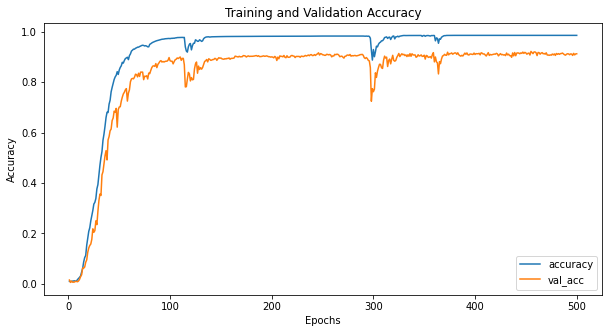

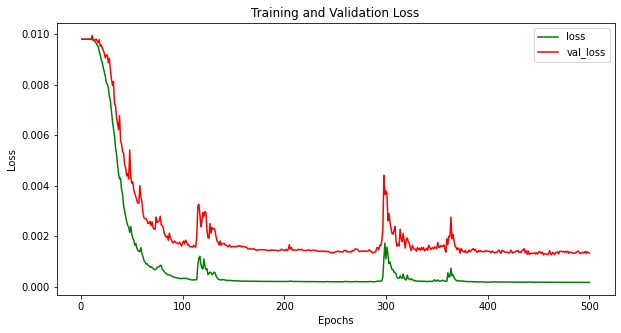

In [ ]:
history=history.history
epochs = range(1, len(history['loss']) + 1)
acc = history['accuracy']
loss = history['loss']
val_acc = history['val_accuracy']
val_loss = history['val_loss']

plt.figure(figsize=(10, 5))
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

plt.figure(figsize=(10, 5))
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()


## 예측해보기(predict)

- 모델을 잊어버리고 저장을 안해놔서 해당 모델 예측해보기는 못했습니다.

In [ ]:
y_pred = model.predict(X_test)

188/188 [==============================] - 2s 9ms/step


array([[44,  0,  0, ...,  0,  0,  0],
       [ 0, 57,  0, ...,  0,  0,  0],
       [ 0,  0, 65, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 68,  0,  0],
       [ 0,  0,  0, ...,  0, 67,  0],
       [ 0,  0,  0, ...,  0,  0, 57]])

In [ ]:
y_test_p=pd.DataFrame(y_test)

for i in range(1,101):
  y_test_p.loc[y_test_p[i] == 1.0 , 'y_test'] = i  
y_test_p.y_test

0       59.0
1       68.0
2       72.0
3        2.0
4       57.0
        ... 
5995     3.0
5996    87.0
5997    40.0
5998    68.0
5999    37.0
Name: y_test, Length: 6000, dtype: float64

In [ ]:
ex=np.argmax(y_pred, axis=1)
ex=ex.astype('float64')
ex=pd.DataFrame(ex)
ex

,0
0,59.0
1,68.0
2,72.0
3,2.0
4,57.0
...,...
5995,3.0
5996,87.0
5997,40.0
5998,68.0


In [ ]:
ch1 = pd.DataFrame(np.rint(y_pred))
ch1['pred'] = ex
data_test.reset_index(inplace=True, drop=True)
predict = pd.concat([data_test,ch1['pred'], y_test_p['y_test']],axis = 1)

In [ ]:
predict['compare'] = np.where(predict['pred']==predict['y_test'],'yes', 'no')

In [ ]:
predict_1 = predict[predict["compare"]=='no']
predict_1

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,pred,y_test,compare
30,0.001909,0.008317,0.014489,0.020412,0.025995,0.031137,0.035801,0.040075,0.044195,0.048538,...,0.044631,0.050399,0.057432,0.066046,0.076371,0.088327,0.101648,85.0,36.0,no
46,0.096114,0.095362,0.095047,0.095447,0.096676,0.098677,0.101247,0.104083,0.106844,0.109202,...,-0.004398,-0.008214,-0.013081,-0.019006,-0.025674,-0.032320,-0.037693,83.0,80.0,no
54,-0.041972,-0.048778,-0.055266,-0.061636,-0.067728,-0.073065,-0.076978,-0.078796,-0.078050,-0.074630,...,-0.102289,-0.108650,-0.114708,-0.119718,-0.122885,-0.123496,-0.121095,20.0,71.0,no
55,0.050686,0.056807,0.061922,0.066330,0.070463,0.074831,0.079964,0.086349,0.094365,0.104239,...,0.125449,0.136371,0.147691,0.159697,0.172642,0.186692,0.201860,41.0,50.0,no
71,-0.511413,-0.507140,-0.469849,-0.408462,-0.333769,-0.256404,-0.185178,-0.126038,-0.081724,-0.052058,...,0.031533,0.034874,0.038518,0.042180,0.045745,0.049241,0.052764,4.0,93.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,0.005315,-0.043084,-0.083200,-0.110473,-0.122973,-0.121490,-0.109050,-0.090022,-0.069069,-0.050204,...,-0.027012,-0.029614,-0.031356,-0.033020,-0.035244,-0.038329,-0.042129,95.0,23.0,no
5981,-0.005281,-0.018280,-0.031669,-0.042939,-0.050464,-0.053648,-0.052817,-0.048958,-0.043371,-0.037307,...,-0.016826,-0.013496,-0.011275,-0.010594,-0.011830,-0.015208,-0.020697,52.0,40.0,no
5992,-0.084734,-0.091664,-0.098196,-0.101411,-0.098148,-0.085744,-0.062829,-0.030004,0.009808,0.051498,...,0.072150,0.081214,0.090895,0.101388,0.112932,0.125713,0.139775,100.0,83.0,no
5994,0.008461,0.011468,0.012707,0.012096,0.009875,0.006558,0.002841,-0.000513,-0.002782,-0.003375,...,-0.048723,-0.051678,-0.052151,-0.050205,-0.046318,-0.041326,-0.036264,95.0,49.0,no


# 3.lowpass

In [ ]:
import os
import itertools
import time
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from torch.optim.lr_scheduler import (CosineAnnealingLR,
                                      CosineAnnealingWarmRestarts,
                                      StepLR,
                                      ExponentialLR)

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, auc, f1_score, precision_score, recall_score

In [ ]:
import tqdm, re, sys
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import plot_confusion_matrix
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint

In [ ]:
data_total = pd.read_csv('/content/drive/MyDrive/model_2s/total_low.csv', header=None)

In [ ]:
data_total

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
0,1.697478,1.713703,1.728594,1.741144,1.750717,1.757105,1.760490,1.761353,1.760349,1.758191,...,1.694451,1.696899,1.699745,1.702543,1.704941,1.706748,1.707952,1.708690,1.709187,1.0
1,1.709674,1.710317,1.711171,1.712183,1.713227,1.714166,1.714897,1.715389,1.715680,1.715858,...,1.739826,1.739925,1.740406,1.741383,1.742927,1.745059,1.747751,1.750910,1.754365,1.0
2,1.757857,1.761049,1.763568,1.765083,1.765388,1.764480,1.762595,1.760185,1.757859,1.756279,...,1.701614,1.704703,1.707794,1.710813,1.713725,1.716508,1.719121,1.721462,1.723356,1.0
3,1.889883,1.889929,1.891485,1.895719,1.903396,1.914786,1.929653,1.947339,1.966906,1.987309,...,2.130833,2.124523,2.111957,2.093147,2.068352,2.038026,2.002789,1.963408,1.920794,1.0
4,1.876008,1.830252,1.784833,1.741100,1.700343,1.663689,1.631993,1.605760,1.585105,1.569759,...,1.641277,1.612898,1.590416,1.573456,1.561349,1.553256,1.548297,1.545665,1.544707,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,1.562186,1.580260,1.590865,1.595333,1.595857,1.594849,1.594406,1.595965,1.600169,1.606928,...,1.609903,1.611269,1.612058,1.612049,1.611103,1.609213,1.606538,1.603402,1.600248,100.0
17996,1.597548,1.595698,1.594912,1.595167,1.596213,1.597637,1.598970,1.599797,1.599838,1.598980,...,1.595455,1.593952,1.593380,1.593925,1.595443,1.597461,1.599283,1.600176,1.599565,100.0
17997,1.520984,1.516451,1.512894,1.510777,1.510324,1.511420,1.513570,1.515967,1.517666,1.517848,...,1.600670,1.597018,1.594806,1.593269,1.591762,1.589812,1.587139,1.583680,1.579595,100.0
17998,1.575260,1.571225,1.568130,1.566590,1.567050,1.569659,1.574187,1.580032,1.586320,1.592084,...,1.592516,1.596574,1.599401,1.600918,1.601328,1.601033,1.600493,1.600067,1.599890,100.0


## 데이터 전체 섞기

In [ ]:
data_total=data_total.sample(frac=1)

In [ ]:
data_train=data_total.iloc[0:14400, :]
data_val=data_total.iloc[14400:16200, :]
data_test=data_total.iloc[16200:18000,:]

In [ ]:
data_train

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
16001,1.678120,1.660007,1.643138,1.627678,1.613974,1.602444,1.593452,1.587184,1.583566,1.582257,...,1.687150,1.690127,1.692782,1.694982,1.696698,1.698019,1.699140,1.700320,1.701844,89.0
2233,1.996164,1.983022,1.966811,1.948035,1.927268,1.905082,1.881997,1.858458,1.834857,1.811564,...,1.491928,1.491751,1.492468,1.493888,1.495770,1.497849,1.499865,1.501605,1.502939,13.0
17135,1.612881,1.606697,1.600482,1.595338,1.592100,1.591197,1.592595,1.595829,1.600118,1.604540,...,1.595881,1.598186,1.600275,1.601689,1.602073,1.601255,1.599290,1.596464,1.593253,96.0
11925,1.584283,1.594660,1.604398,1.612894,1.619760,1.624874,1.628378,1.630633,1.632150,1.633497,...,1.531495,1.536493,1.543003,1.551048,1.560367,1.570395,1.580319,1.589172,1.595977,67.0
14461,1.578565,1.575550,1.572518,1.569882,1.567996,1.567088,1.567223,1.568295,1.570050,1.572136,...,1.526607,1.601567,1.658287,1.697719,1.723120,1.739021,1.750113,1.760301,1.772099,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13380,1.299977,1.296961,1.295929,1.296972,1.299345,1.301509,1.301453,1.297275,1.287903,1.273758,...,1.796426,1.800927,1.804598,1.807086,1.808256,1.808211,1.807264,1.805848,1.804412,75.0
13951,1.789448,1.807071,1.825282,1.843602,1.861601,1.878967,1.895518,1.911169,1.925849,1.939395,...,1.543197,1.546292,1.550653,1.555924,1.561532,1.566747,1.570775,1.572884,1.572522,78.0
12825,1.627521,1.610135,1.594244,1.581089,1.571523,1.565896,1.564017,1.565204,1.568431,1.572525,...,1.589589,1.590863,1.593416,1.597655,1.603745,1.611515,1.620443,1.629702,1.638282,72.0
6703,1.587773,1.590579,1.594525,1.599089,1.603409,1.606451,1.607252,1.605169,1.600082,1.592489,...,1.698117,1.679718,1.659785,1.639587,1.620506,1.603797,1.590367,1.580617,1.574402,38.0


## 전처리

In [ ]:
y_train = to_categorical(data_train[512])
y_test = to_categorical(data_test[512])
y_val = to_categorical(data_val[512])
y_train[14399]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
data_train.drop([512], axis=1, inplace=True)
data_test.drop([512], axis=1, inplace=True)
data_val.drop([512], axis=1, inplace=True)
data_train

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
16001,1.678120,1.660007,1.643138,1.627678,1.613974,1.602444,1.593452,1.587184,1.583566,1.582257,...,1.684038,1.687150,1.690127,1.692782,1.694982,1.696698,1.698019,1.699140,1.700320,1.701844
2233,1.996164,1.983022,1.966811,1.948035,1.927268,1.905082,1.881997,1.858458,1.834857,1.811564,...,1.493115,1.491928,1.491751,1.492468,1.493888,1.495770,1.497849,1.499865,1.501605,1.502939
17135,1.612881,1.606697,1.600482,1.595338,1.592100,1.591197,1.592595,1.595829,1.600118,1.604540,...,1.593820,1.595881,1.598186,1.600275,1.601689,1.602073,1.601255,1.599290,1.596464,1.593253
11925,1.584283,1.594660,1.604398,1.612894,1.619760,1.624874,1.628378,1.630633,1.632150,1.633497,...,1.527766,1.531495,1.536493,1.543003,1.551048,1.560367,1.570395,1.580319,1.589172,1.595977
14461,1.578565,1.575550,1.572518,1.569882,1.567996,1.567088,1.567223,1.568295,1.570050,1.572136,...,1.435433,1.526607,1.601567,1.658287,1.697719,1.723120,1.739021,1.750113,1.760301,1.772099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13380,1.299977,1.296961,1.295929,1.296972,1.299345,1.301509,1.301453,1.297275,1.287903,1.273758,...,1.791576,1.796426,1.800927,1.804598,1.807086,1.808256,1.808211,1.807264,1.805848,1.804412
13951,1.789448,1.807071,1.825282,1.843602,1.861601,1.878967,1.895518,1.911169,1.925849,1.939395,...,1.541475,1.543197,1.546292,1.550653,1.555924,1.561532,1.566747,1.570775,1.572884,1.572522
12825,1.627521,1.610135,1.594244,1.581089,1.571523,1.565896,1.564017,1.565204,1.568431,1.572525,...,1.589067,1.589589,1.590863,1.593416,1.597655,1.603745,1.611515,1.620443,1.629702,1.638282
6703,1.587773,1.590579,1.594525,1.599089,1.603409,1.606451,1.607252,1.605169,1.600082,1.592489,...,1.714012,1.698117,1.679718,1.659785,1.639587,1.620506,1.603797,1.590367,1.580617,1.574402


In [ ]:
X_train=data_train.values
X_test=data_test.values
X_val=data_val.values

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(14400, 512, 1)
(1800, 512, 1)
(1800, 512, 1)
(14400, 101)
(1800, 101)
(1800, 101)


In [ ]:

X_train = X_train.reshape(14400, 512, 1)
X_test = X_test.reshape(1800, 512, 1)
X_val = X_val.reshape(1800, 512, 1)
X_train.shape, X_test.shape, X_val.shape

((14400, 512, 1), (1800, 512, 1), (1800, 512, 1))

## LSTM

In [ ]:
from keras.layers import Input, Embedding, GRU, LSTM, SimpleRNN, MaxPooling1D, GlobalMaxPool1D, CuDNNGRU
from keras.layers import Dropout, Dense, Activation, Flatten, Conv1D, SpatialDropout1D
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units=150, return_sequences=True, input_shape=(512,1))) #shape[1]=열
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=True))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(101, activation='softmax'))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 512, 150)          91200     
                                                                 
 lstm_4 (LSTM)               (None, 512, 50)           40200     
                                                                 
 lstm_5 (LSTM)               (None, 512, 50)           20200     
                                                                 
 flatten_1 (Flatten)         (None, 25600)             0         
                                                                 
 dropout_1 (Dropout)         (None, 25600)             0         
                                                                 
 dense_1 (Dense)             (None, 101)               2585701   
                                                                 
Total params: 2,737,301
Trainable params: 2,737,301
No

## 모델학습/평가

In [ ]:
history = model.fit(X_train, y_train, batch_size =1024, epochs = 500, verbose = 1, validation_data=(X_val, y_val))

Epoch 1/500
15/15 [==============================] - 6s 395ms/step - loss: 0.0098 - accuracy: 0.0126 - val_loss: 0.0098 - val_accuracy: 0.0094
Epoch 2/500
15/15 [==============================] - 6s 396ms/step - loss: 0.0098 - accuracy: 0.0116 - val_loss: 0.0098 - val_accuracy: 0.0172
Epoch 3/500
15/15 [==============================] - 6s 400ms/step - loss: 0.0098 - accuracy: 0.0130 - val_loss: 0.0099 - val_accuracy: 0.0000e+00
Epoch 4/500
15/15 [==============================] - 6s 402ms/step - loss: 0.0099 - accuracy: 0.0091 - val_loss: 0.0098 - val_accuracy: 0.0089
Epoch 5/500
15/15 [==============================] - 6s 404ms/step - loss: 0.0098 - accuracy: 0.0098 - val_loss: 0.0098 - val_accuracy: 0.0100
Epoch 6/500
15/15 [==============================] - 6s 402ms/step - loss: 0.0098 - accuracy: 0.0120 - val_loss: 0.0098 - val_accuracy: 0.0094
Epoch 7/500
15/15 [==============================] - 6s 401ms/step - loss: 0.0098 - accuracy: 0.0134 - val_loss: 0.0098 - val_accuracy: 0.

In [ ]:
model.evaluate(X_test, y_test)

57/57 [==============================] - 1s 22ms/step - loss: 0.0015 - accuracy: 0.9017


[0.0014801811194047332, 0.9016666412353516]

In [ ]:
model.save('lstm_lowpass_2s.h5')

## 그래프 분석

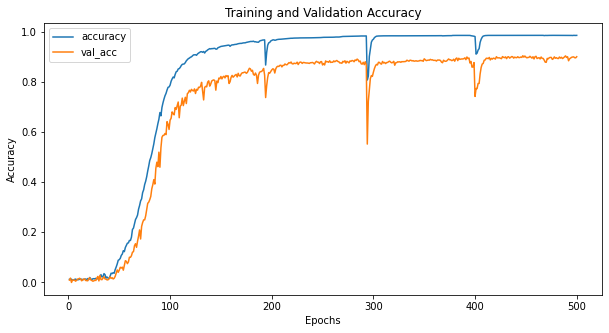

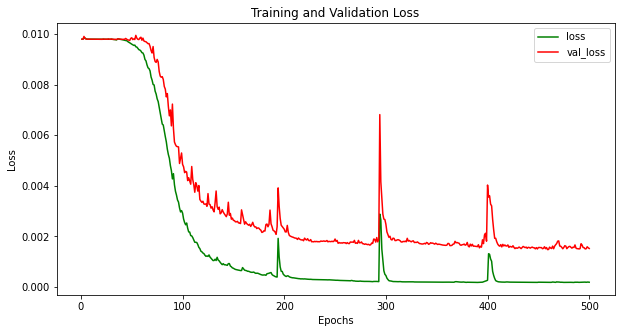

In [ ]:
history=history.history
epochs = range(1, len(history['loss']) + 1)
acc = history['accuracy']
loss = history['loss']
val_acc = history['val_accuracy']
val_loss = history['val_loss']

plt.figure(figsize=(10, 5))
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

plt.figure(figsize=(10, 5))
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()


## 예측해보기(predict)

- 모델을 잊어버리고 저장을 안해놔서 해당 모델 예측해보기는 못했습니다.

In [ ]:
y_pred = model.predict(X_test)

188/188 [==============================] - 2s 9ms/step


array([[44,  0,  0, ...,  0,  0,  0],
       [ 0, 57,  0, ...,  0,  0,  0],
       [ 0,  0, 65, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 68,  0,  0],
       [ 0,  0,  0, ...,  0, 67,  0],
       [ 0,  0,  0, ...,  0,  0, 57]])

In [ ]:
y_test_p=pd.DataFrame(y_test)

for i in range(1,101):
  y_test_p.loc[y_test_p[i] == 1.0 , 'y_test'] = i  
y_test_p.y_test

0       59.0
1       68.0
2       72.0
3        2.0
4       57.0
        ... 
5995     3.0
5996    87.0
5997    40.0
5998    68.0
5999    37.0
Name: y_test, Length: 6000, dtype: float64

In [ ]:
ex=np.argmax(y_pred, axis=1)
ex=ex.astype('float64')
ex=pd.DataFrame(ex)
ex

,0
0,59.0
1,68.0
2,72.0
3,2.0
4,57.0
...,...
5995,3.0
5996,87.0
5997,40.0
5998,68.0


In [ ]:
ch1 = pd.DataFrame(np.rint(y_pred))
ch1['pred'] = ex
data_test.reset_index(inplace=True, drop=True)
predict = pd.concat([data_test,ch1['pred'], y_test_p['y_test']],axis = 1)

In [ ]:
predict['compare'] = np.where(predict['pred']==predict['y_test'],'yes', 'no')

In [ ]:
predict_1 = predict[predict["compare"]=='no']
predict_1

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,pred,y_test,compare
30,0.001909,0.008317,0.014489,0.020412,0.025995,0.031137,0.035801,0.040075,0.044195,0.048538,...,0.044631,0.050399,0.057432,0.066046,0.076371,0.088327,0.101648,85.0,36.0,no
46,0.096114,0.095362,0.095047,0.095447,0.096676,0.098677,0.101247,0.104083,0.106844,0.109202,...,-0.004398,-0.008214,-0.013081,-0.019006,-0.025674,-0.032320,-0.037693,83.0,80.0,no
54,-0.041972,-0.048778,-0.055266,-0.061636,-0.067728,-0.073065,-0.076978,-0.078796,-0.078050,-0.074630,...,-0.102289,-0.108650,-0.114708,-0.119718,-0.122885,-0.123496,-0.121095,20.0,71.0,no
55,0.050686,0.056807,0.061922,0.066330,0.070463,0.074831,0.079964,0.086349,0.094365,0.104239,...,0.125449,0.136371,0.147691,0.159697,0.172642,0.186692,0.201860,41.0,50.0,no
71,-0.511413,-0.507140,-0.469849,-0.408462,-0.333769,-0.256404,-0.185178,-0.126038,-0.081724,-0.052058,...,0.031533,0.034874,0.038518,0.042180,0.045745,0.049241,0.052764,4.0,93.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,0.005315,-0.043084,-0.083200,-0.110473,-0.122973,-0.121490,-0.109050,-0.090022,-0.069069,-0.050204,...,-0.027012,-0.029614,-0.031356,-0.033020,-0.035244,-0.038329,-0.042129,95.0,23.0,no
5981,-0.005281,-0.018280,-0.031669,-0.042939,-0.050464,-0.053648,-0.052817,-0.048958,-0.043371,-0.037307,...,-0.016826,-0.013496,-0.011275,-0.010594,-0.011830,-0.015208,-0.020697,52.0,40.0,no
5992,-0.084734,-0.091664,-0.098196,-0.101411,-0.098148,-0.085744,-0.062829,-0.030004,0.009808,0.051498,...,0.072150,0.081214,0.090895,0.101388,0.112932,0.125713,0.139775,100.0,83.0,no
5994,0.008461,0.011468,0.012707,0.012096,0.009875,0.006558,0.002841,-0.000513,-0.002782,-0.003375,...,-0.048723,-0.051678,-0.052151,-0.050205,-0.046318,-0.041326,-0.036264,95.0,49.0,no
